In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Processing the Data

---

In [2]:
titanic_df = pd.read_csv('titanic/titanic.csv')
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [3]:
titanic_df.info()
titanic_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
criteria = titanic_df['Embarked'].isnull()
titanic_df = titanic_df[~criteria]
titanic_df.drop('Cabin', axis=1, inplace=True)
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [5]:
from sklearn.preprocessing import OneHotEncoder

# Encoding "Embarked" values
encoder = OneHotEncoder()

embarked = encoder.fit_transform(titanic_df[["Embarked"]]).toarray()

titanic_df[["C", "S", "Q"]] = embarked

In [6]:
# Storing Joe’s experiment results as np arrays
x = np.array([3, 5, 6, 8])
y = np.array([20, 35, 45, 50])

# Reshaping arrays
X = x.reshape(4, 1)
Y = y.reshape(4, 1)


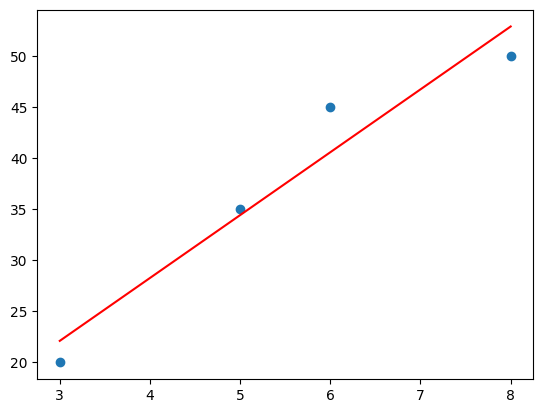

In [7]:
from sklearn.linear_model import LinearRegression

# Step 1: Initialise LinearRegression
model = LinearRegression()

# Step 2: Fit the model
model.fit(X, Y)

# Drawing the best fit line using y = mx + c
plt.scatter(X, Y)
plt.plot(x, model.coef_[0][0] * x + model.intercept_[0], color="red")

del X, Y, x, y


In [10]:
from sklearn.model_selection import train_test_split

x = titanic_df[['Age', 'Fare', 'Pclass', 'C', 'S', 'Q']]
y = titanic_df['Survived']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Decision trees and random forests

---

In [13]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=2)

clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=2)

In [14]:
from sklearn.metrics import accuracy_score

predictions = clf.predict(x_test)

accuracy = accuracy_score(y_test, predictions)
print("Accuracy", accuracy)

Accuracy 0.6348314606741573


In [15]:
from sklearn.ensemble import RandomForestClassifier

clf = DecisionTreeClassifier(random_state=2)

clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=2)

In [16]:
from sklearn.metrics import accuracy_score

predictions = clf.predict(x_test)

accuracy = accuracy_score(y_test, predictions)
print("Accuracy", accuracy)

Accuracy 0.6348314606741573
